<a href="https://colab.research.google.com/github/dssemugabi/AI-and-Nearal-networks/blob/main/AI_and_neural_networks_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

Loading and Exploring the MNIST Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Dataset Shape

In [ ]:
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


Exploring Labels

In [ ]:
print("Unique labels:", np.unique(y_train))

Unique labels: [0 1 2 3 4 5 6 7 8 9]


Visualising Sample Images

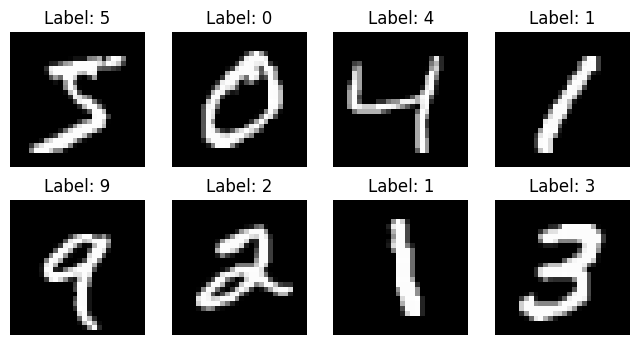

In [ ]:
plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

2.4 Normalising the Data

In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

Model Implementation

4.1 Model Builder Function

In [ ]:
def build_model(hidden_activation):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(256, activation=hidden_activation),
        Dense(256, activation=hidden_activation),
        Dense(128, activation=hidden_activation),
        Dense(128, activation=hidden_activation),
        Dense(64, activation=hidden_activation),
        Dense(64, activation=hidden_activation),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

5. Training Model

1 – Sigmoid Activation

In [ ]:
sigmoid_model = build_model('sigmoid')

history_sigmoid = sigmoid_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)

sigmoid_test_loss, sigmoid_test_acc = sigmoid_model.evaluate(
    x_test, y_test
)

print("Sigmoid Test Accuracy:", sigmoid_test_acc)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.1895 - loss: 2.0700 - val_accuracy: 0.4065 - val_loss: 1.2357
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5460 - loss: 1.0860 - val_accuracy: 0.8985 - val_loss: 0.4305
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9006 - loss: 0.3954 - val_accuracy: 0.9503 - val_loss: 0.2069
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9413 - loss: 0.2321 - val_accuracy: 0.9588 - val_loss: 0.1713
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9567 - loss: 0.1690 - val_accuracy: 0.9635 - val_loss: 0.1441
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9658 - loss: 0.1297 - val_accuracy: 0.9678 - val_loss: 0.1279
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9708 - loss: 0.1095 - val_accuracy: 0.9712 - val_loss: 0.1139
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9765 - loss: 0.0915 - val_acc


Accuracy and Loss Curves
> Add blockquote



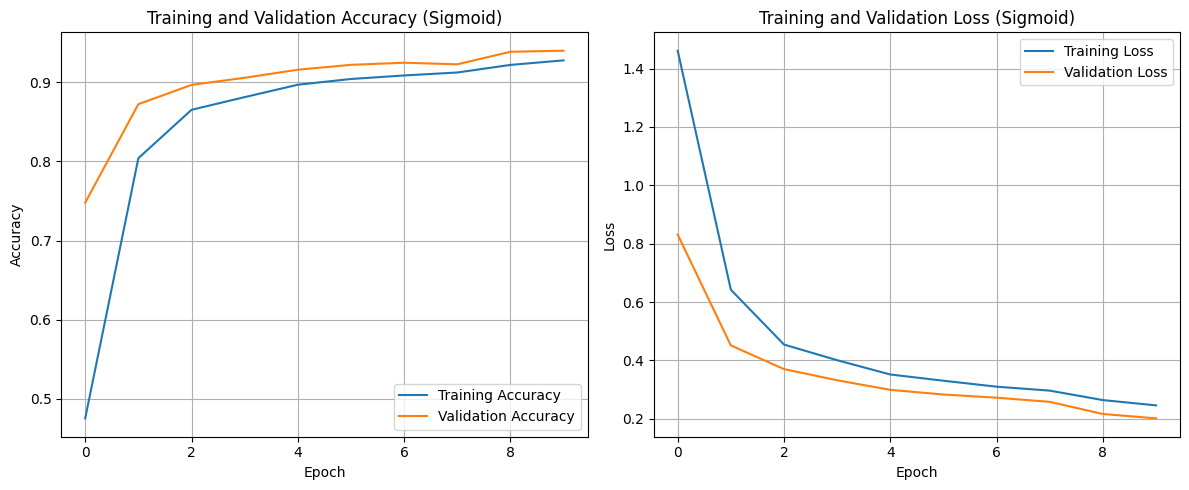

In [ ]:
import matplotlib.pyplot as plt

if 'history_sigmoid' not in globals():
    print("Warning: history_sigmoid not found. Re-running Sigmoid model training...")

    sigmoid_model = build_model('sigmoid')
    history_sigmoid = sigmoid_model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=128,
        validation_split=0.1,
        verbose=0
    )

# Create figure
plt.figure(figsize=(12, 5))

# ---- Accuracy plot ----
plt.subplot(1, 2, 1)
plt.plot(history_sigmoid.history['accuracy'], label='Training Accuracy')
plt.plot(history_sigmoid.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Sigmoid)')
plt.legend()
plt.grid(True)

# - Loss plot ----
plt.subplot(1, 2, 2)
plt.plot(history_sigmoid.history['loss'], label='Training Loss')
plt.plot(history_sigmoid.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Sigmoid)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

confusion matrix for Sigmoid Model.

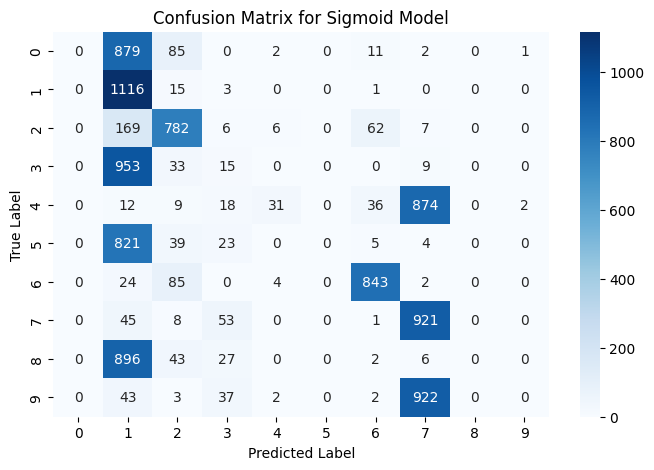

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

if 'sigmoid_model' not in globals() or 'build_model' not in globals():
    print("Warning: sigmoid_model or build_model not found. Re-building and re-training for confusion matrix plot...")

    # Define build_model function to ensure it's available
    def build_model(hidden_activation):
        model = Sequential([
            Flatten(input_shape=(28, 28)),
            Dense(256, activation=hidden_activation),
            Dense(256, activation=hidden_activation),
            Dense(128, activation=hidden_activation),
            Dense(128, activation=hidden_activation),
            Dense(64, activation=hidden_activation),
            Dense(64, activation=hidden_activation),
            Dense(10, activation='softmax')
        ])

        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

    # Check if x_train, y_train, x_test, y_test are defined, if not, load and normalize them
    if 'x_train' not in globals():
        from tensorflow.keras.datasets import mnist
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        x_train = x_train.astype("float32") / 255.0
        x_test = x_test.astype("float32") / 255.0

    sigmoid_model = build_model('sigmoid')

    sigmoid_model.fit(
        x_train, y_train,
        epochs=1, # Re-train for 1 epoch to quickly make it functional
        batch_size=128,
        validation_split=0.1,
        verbose=0
    )

# Get predictions if not already available from previous cells
if 'y_pred_classes_sigmoid' not in globals():
    y_pred_sigmoid = sigmoid_model.predict(x_test)
    y_pred_classes_sigmoid = np.argmax(y_pred_sigmoid, axis=1)

# Compute the confusion matrix
conf_matrix_sigmoid = confusion_matrix(y_test, y_pred_classes_sigmoid)

# Plot the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_sigmoid, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Sigmoid Model')
plt.show()

Class Based Metrics for the Model




In [ ]:
from sklearn.metrics import classification_report

# Ensure sigmoid_model is defined and predictions are available
# (This section is similar to the confusion matrix cell to ensure robustness)
if 'sigmoid_model' not in globals():
    print("Warning: sigmoid_model not found. Re-building and re-training for class-based metrics...")
    sigmoid_model = build_model('sigmoid')
    sigmoid_model.fit(
        x_train, y_train,
        epochs=1, # Re-train for 1 epoch to quickly make it functional
        batch_size=128,
        validation_split=0.1,
        verbose=0
    )

# Get predictions if not already available from previous cells
if 'y_pred_classes_sigmoid' not in globals():
    y_pred_sigmoid = sigmoid_model.predict(x_test)
    y_pred_classes_sigmoid = np.argmax(y_pred_sigmoid, axis=1)

# Generate and print the classification report
print("Classification Report for Sigmoid Model:")
print(classification_report(y_test, y_pred_classes_sigmoid))

Classification Report for Sigmoid Model:
              precision    recall  f1-score   support

           0       0.62      0.90      0.73       980
           1       0.95      0.98      0.96      1135
           2       0.90      0.72      0.80      1032
           3       0.74      0.82      0.78      1010
           4       0.69      0.79      0.74       982
           5       0.79      0.32      0.46       892
           6       0.83      0.90      0.87       958
           7       0.93      0.82      0.87      1028
           8       0.61      0.70      0.65       974
           9       0.70      0.64      0.67      1009

    accuracy                           0.77     10000
   macro avg       0.78      0.76      0.75     10000
weighted avg       0.78      0.77      0.76     10000



6. Training Model 2 –

Tanh Activation

In [ ]:
tanh_model = build_model('tanh')

history_tanh = tanh_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)

tanh_test_loss, tanh_test_acc = tanh_model.evaluate(
    x_test, y_test
)

print("Tanh Test Accuracy:", tanh_test_acc)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8530 - loss: 0.5186 - val_accuracy: 0.9573 - val_loss: 0.1447
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9538 - loss: 0.1507 - val_accuracy: 0.9730 - val_loss: 0.0945
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9719 - loss: 0.0949 - val_accuracy: 0.9670 - val_loss: 0.1053
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9776 - loss: 0.0741 - val_accuracy: 0.9720 - val_loss: 0.1021
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9805 - loss: 0.0625 - val_accuracy: 0.9777 - val_loss: 0.0776
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9860 - loss: 0.0453 - val_accuracy: 0.9725 - val_loss: 0.0900
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9863 - loss: 0.0441 - val_accuracy: 0.9690 - val_loss: 0.1119
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9891 - loss: 0.0339 - val_accu

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


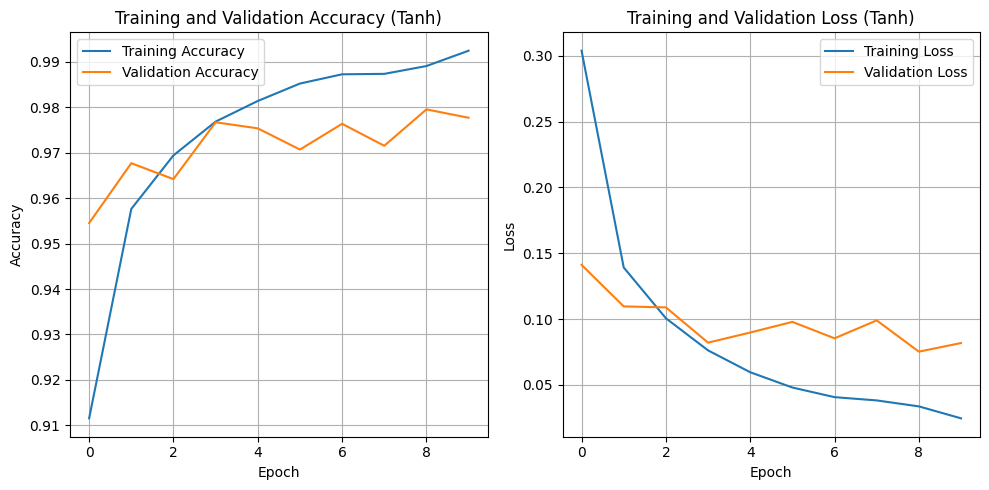

In [7]:
import matplotlib.pyplot as plt

if 'history_tanh' not in globals():
    print("Warning: history_tanh not found. Re-running Tanh model training...")

    tanh_model = build_model('tanh')
    history_tanh = tanh_model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=128,
        validation_split=0.1,
        verbose=0 # Suppress verbose output during re-training
    )

# Create figure
plt.figure(figsize=(10, 5))

# ---- Accuracy plot ----
plt.subplot(1, 2, 1)
plt.plot(history_tanh.history['accuracy'], label='Training Accuracy')
plt.plot(history_tanh.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Tanh)')
plt.legend()
plt.grid(True)

# - Loss plot ----
plt.subplot(1, 2, 2)
plt.plot(history_tanh.history['loss'], label='Training Loss')
plt.plot(history_tanh.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Tanh)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


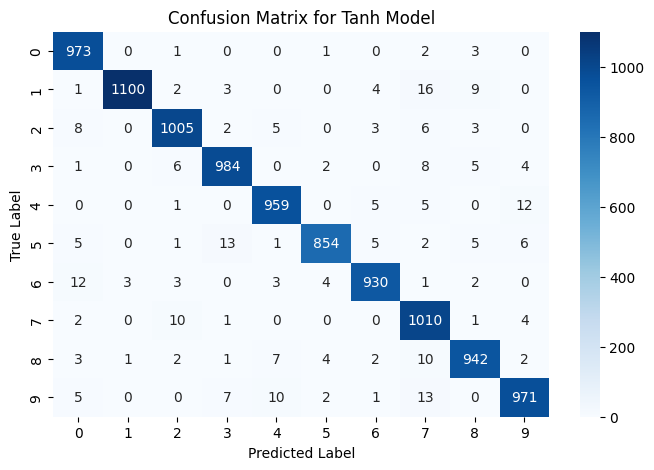

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

if 'tanh_model' not in globals():
    print("Warning: tanh_model not found. Re-building and re-training for confusion matrix plot...")

    tanh_model = build_model('tanh')

    tanh_model.fit(
        x_train, y_train,
        epochs=1,
        batch_size=128,
        validation_split=0.1,
        verbose=0
    )

# Make predictions on the test set using the Tanh model
y_pred_tanh = tanh_model.predict(x_test)
y_pred_classes_tanh = np.argmax(y_pred_tanh, axis=1)

# Compute the confusion matrix
conf_matrix_tanh = confusion_matrix(y_test, y_pred_classes_tanh)

# Plot the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_tanh, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Tanh Model')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Ensure tanh_model is defined and predictions are available
# (This section is similar to the confusion matrix cell to ensure robustness)
if 'tanh_model' not in globals():
    print("Warning: tanh_model not found. Re-building and re-training for class-based metrics...")
    tanh_model = build_model('tanh')
    tanh_model.fit(
        x_train, y_train,
        epochs=1, # Re-train for 1 epoch to quickly make it functional
        batch_size=128,
        validation_split=0.1,
        verbose=0
    )

# Get predictions if not already available from previous cells
if 'y_pred_classes_tanh' not in globals():
    y_pred_tanh = tanh_model.predict(x_test)
    y_pred_classes_tanh = np.argmax(y_pred_tanh, axis=1)

# Generate and print the classification report
print("Classification Report for Tanh Model:")
print(classification_report(y_test, y_pred_classes_tanh))

Classification Report for Tanh Model:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.92      0.95      0.94      1032
           3       0.93      0.91      0.92      1010
           4       0.90      0.96      0.93       982
           5       0.88      0.92      0.90       892
           6       0.96      0.95      0.95       958
           7       0.97      0.91      0.94      1028
           8       0.91      0.90      0.91       974
           9       0.91      0.89      0.90      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



7. Performance Comparison Plots

In [ ]:
import tensorflow as tf

# Ensure sigmoid_test_acc is defined, if not, re-run Sigmoid model training and evaluation
if 'sigmoid_test_acc' not in globals():
    print("Warning: sigmoid_test_acc not found. Re-running Sigmoid model training and evaluation...")
    sigmoid_model = build_model('sigmoid')
    history_sigmoid = sigmoid_model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=128,
        validation_split=0.1,
        verbose=0
    )
    _, sigmoid_test_acc = sigmoid_model.evaluate(x_test, y_test, verbose=0)

# Ensure tanh_test_acc is defined, if not, re-run Tanh model training and evaluation
if 'tanh_test_acc' not in globals():
    print("Warning: tanh_test_acc not found. Re-running Tanh model training and evaluation...")
    tanh_model = build_model('tanh')
    history_tanh = tanh_model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=128,
        validation_split=0.1,
        verbose=0
    )
    _, tanh_test_acc = tanh_model.evaluate(x_test, y_test, verbose=0)

print(f"Sigmoid Model Test Accuracy: {sigmoid_test_acc:.4f}")
print(f"Tanh Model Test Accuracy: {tanh_test_acc:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sigmoid Model Test Accuracy: 0.9226
Tanh Model Test Accuracy: 0.9258


### Validation Loss and Accuracy Comparison

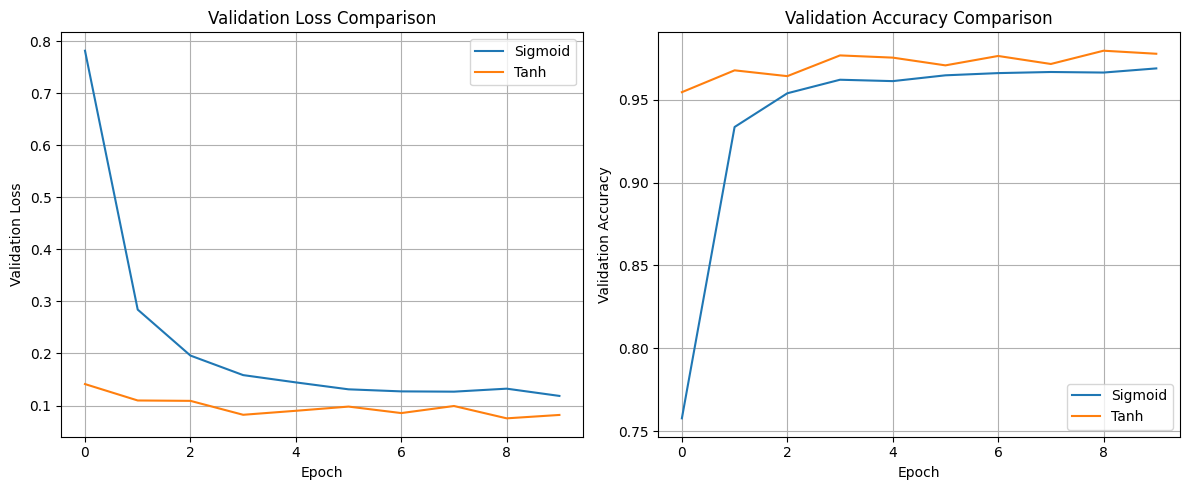

In [12]:
import matplotlib.pyplot as plt

if 'history_sigmoid' not in globals():
    print("Warning: history_sigmoid not found. Re-running Sigmoid model training...")
    sigmoid_model = build_model('sigmoid')
    history_sigmoid = sigmoid_model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=128,
        validation_split=0.1,
        verbose=0
    )

if 'history_tanh' not in globals():
    print("Warning: history_tanh not found. Re-running Tanh model training...")
    tanh_model = build_model('tanh')
    history_tanh = tanh_model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=128,
        validation_split=0.1,
        verbose=0
    )

plt.figure(figsize=(12, 5))

# Subplot 1: Validation Loss Comparison
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(history_sigmoid.history['val_loss'], label='Sigmoid')
plt.plot(history_tanh.history['val_loss'], label='Tanh')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Comparison')
plt.legend()
plt.grid(True)

# Subplot 2: Validation Accuracy Comparison
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid')
plt.plot(history_tanh.history['val_accuracy'], label='Tanh')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

# New Section